In [1]:
#import pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%


In [3]:
# Define the Feedforward Neural Network
class FeedforwardNN(nn.Module):
    def __init__(self, activation_function):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        if activation_function == 'relu':
            self.activation = nn.ReLU()
        elif activation_function == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation_function == 'tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Unsupported activation function")
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train the model
def train_model(activation_function):
    model = FeedforwardNN(activation_function)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    num_epochs = 5
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()       #clear previous gradients
            outputs = model(images)     #process image input with forwardpass
            loss = criterion(outputs, labels)       #computes loss
            loss.backward()  # Computes the gradients of the loss with respect to the model parameters
            optimizer.step()  # Updates the model parameters using the computed gradients
        print(f'Activation: {activation_function}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

# Function to evaluate the model
def evaluate_model(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy


Training with relu activation
Activation: relu, Epoch [1/5], Loss: 0.2863
Activation: relu, Epoch [2/5], Loss: 0.1431
Activation: relu, Epoch [3/5], Loss: 0.2693
Activation: relu, Epoch [4/5], Loss: 0.0591
Activation: relu, Epoch [5/5], Loss: 0.1154
Accuracy: 96.38%

Training with sigmoid activation
Activation: sigmoid, Epoch [1/5], Loss: 0.0995
Activation: sigmoid, Epoch [2/5], Loss: 0.1792
Activation: sigmoid, Epoch [3/5], Loss: 0.0117
Activation: sigmoid, Epoch [4/5], Loss: 0.1593
Activation: sigmoid, Epoch [5/5], Loss: 0.0196
Accuracy: 96.73%

Training with tanh activation
Activation: tanh, Epoch [1/5], Loss: 0.0594
Activation: tanh, Epoch [2/5], Loss: 0.1278
Activation: tanh, Epoch [3/5], Loss: 0.2595
Activation: tanh, Epoch [4/5], Loss: 0.0673
Activation: tanh, Epoch [5/5], Loss: 0.0512
Accuracy: 96.10%


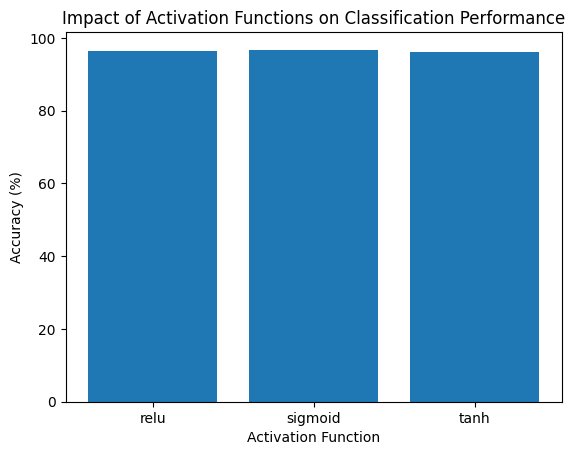

In [4]:
# Train and evaluate models with different activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']
accuracies = {}
for activation in activation_functions:
    print(f'\nTraining with {activation} activation')
    model = train_model(activation)
    accuracies[activation] = evaluate_model(model)

# Plot activation function performance
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Activation Function')
plt.ylabel('Accuracy (%)')
plt.title('Impact of Activation Functions on Classification Performance')
plt.show()

All activation functions have performed equally on the classification problem